# 🫀 Heart Disease Prediction Project
This notebook presents a complete pipeline for analyzing and predicting heart disease based on patient data, using the DrivenData competition dataset.

## 1. Data Loading & Merging

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
values = pd.read_csv(r"D:\Users\Farhan\Desktop\Projects\PRCP-1016-HeartDieseasePred\Data\values.csv")
labels = pd.read_csv(r"D:\Users\Farhan\Desktop\Projects\PRCP-1016-HeartDieseasePred\Data\labels.csv")

# Merge datasets
df = pd.merge(values, labels, on='patient_id')
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


## 2. Data Cleaning

In [2]:
# Identify numeric columns excluding 'thal' and 'patient_id'
numeric_cols = df.drop(columns=['patient_id', 'thal', 'heart_disease_present']).columns

# Convert numeric columns to numeric types, coerce errors to NaN
df[numeric_cols] = df[numeric_cols].apply(lambda col: pd.to_numeric(col, errors='coerce'))

# One-hot encode 'thal'
df = pd.get_dummies(df, columns=['thal'], drop_first=True)

# Drop rows with any remaining missing values
df_clean = df.dropna()

# Drop patient_id column
df_clean = df_clean.drop(columns=['patient_id'], errors='ignore')

# Print shape of cleaned data
print('After cleaning:', df_clean.shape)
df_clean.head()

After cleaning: (180, 15)


,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_normal,thal_reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0,True,False
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0,True,False
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1,True,False
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1,False,True
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0,False,True


## 3. Exploratory Data Analysis (EDA)

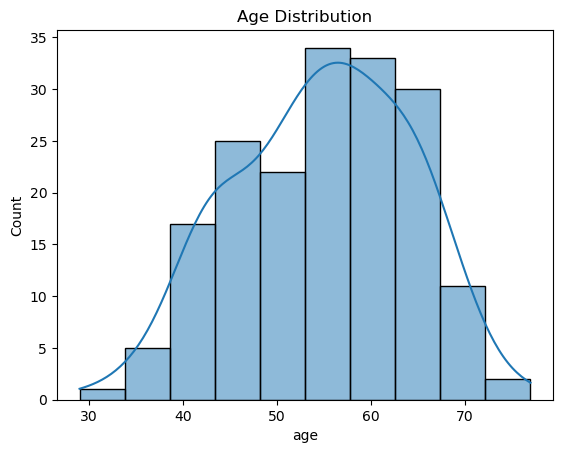

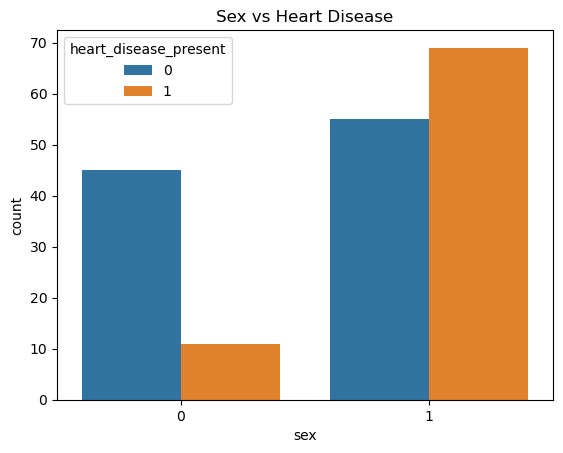

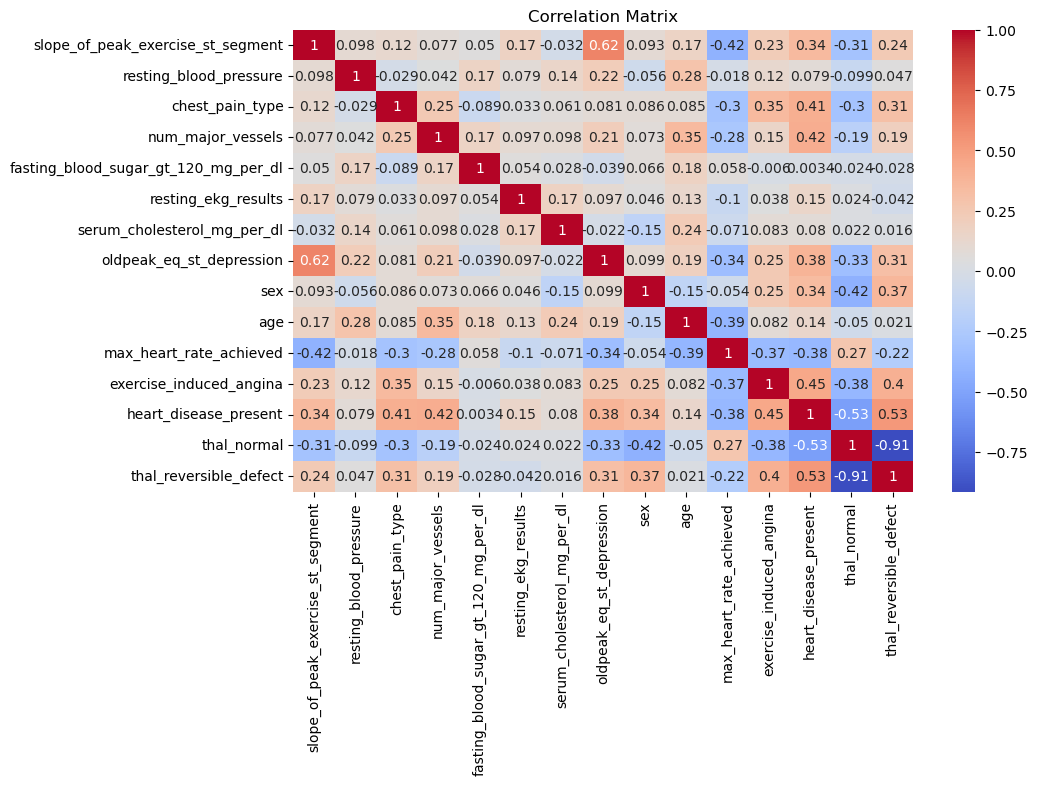

In [3]:
# Age distribution
sns.histplot(df_clean['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Heart disease count by sex
sns.countplot(x='sex', hue='heart_disease_present', data=df_clean)
plt.title('Sex vs Heart Disease')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 4. Modeling & Evaluation

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

X = df_clean.drop('heart_disease_present', axis=1)
y = df_clean['heart_disease_present']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    })

pd.DataFrame(results).sort_values(by='ROC AUC', ascending=False)

,Model,Accuracy,F1 Score,ROC AUC
2,Random Forest,0.833333,0.833333,0.959375
3,SVM,0.861111,0.848485,0.946875
0,Logistic Regression,0.833333,0.823529,0.940625
4,KNN,0.833333,0.823529,0.881250
1,Decision Tree,0.833333,0.812500,0.831250


## 5. ROC Curves

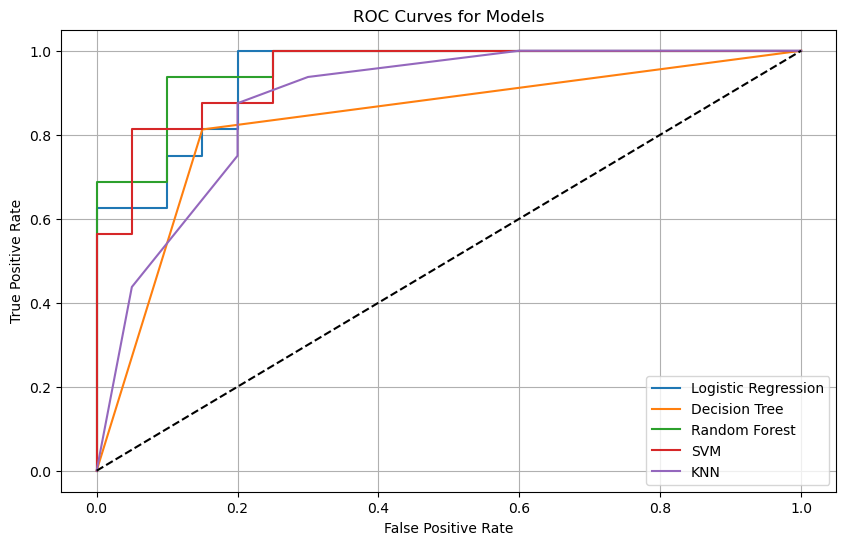

In [5]:
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Models')
plt.legend()
plt.grid()
plt.show()

## 6. Feature Importance (Random Forest)

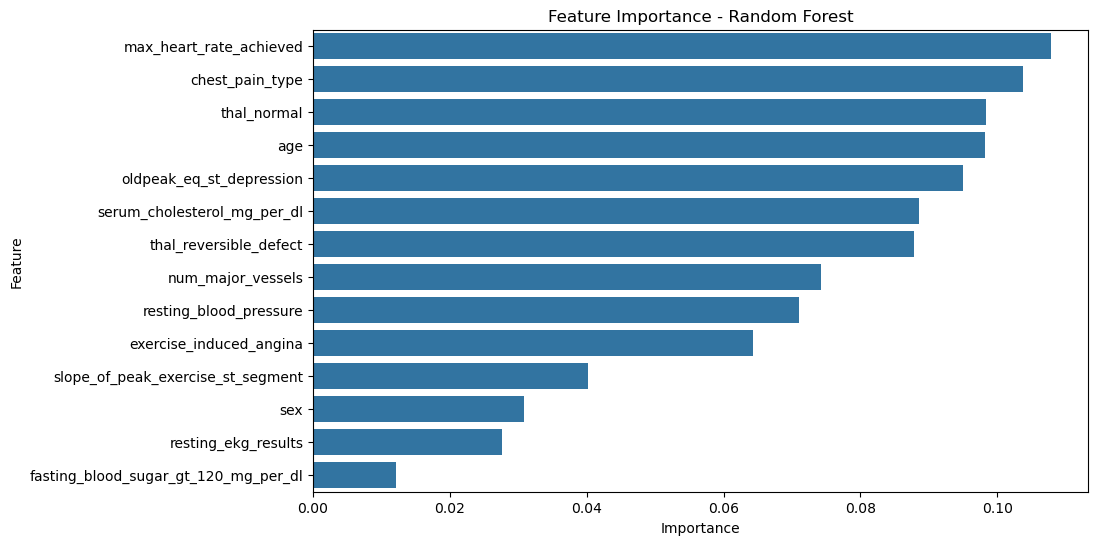

In [6]:
importances = models['Random Forest'].feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns[indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## 7. Recommendations for the Hospital
- **Focused Screening**: Patients >50 years old with high cholesterol or high BP.
- **Early Intervention**: Track patients with hypertension, diabetes, or low max heart rate.
- **Lifestyle Campaigns**: Promote diet, exercise, stress reduction, and smoking cessation.
- **Public Awareness**: Highlight warning signs and prevention.
- **Predictive Alert System**: Deploy ML model to trigger alerts for high-risk patients.

## 8. Conclusion
We built several models to predict heart disease and found Random Forest performed best.
Using key features like age, cholesterol, and ECG results, hospitals can proactively prevent heart attacks using predictive ML systems.